In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

customer_data = pd.read_csv("data/Mall_Customers.csv")
customer_data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
customer_data.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

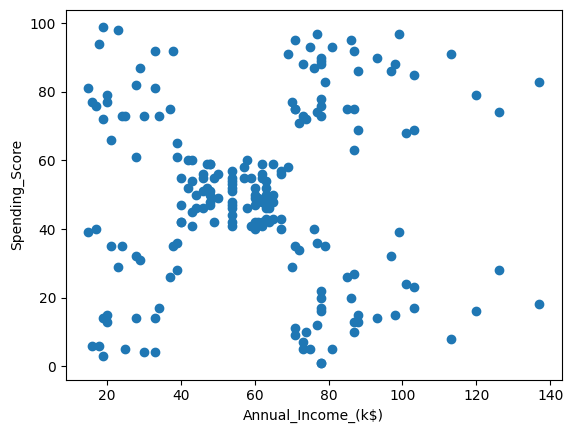

In [3]:
plt.scatter(customer_data['Annual_Income_(k$)'] , customer_data['Spending_Score'])
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending_Score')
plt.show()

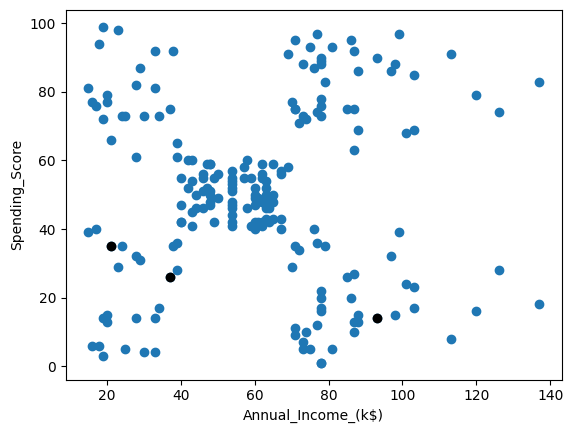

In [4]:
K=3
centroids = customer_data.sample(n=K) #get random k centroids
plt.scatter(customer_data['Annual_Income_(k$)'] , customer_data['Spending_Score'])
plt.scatter(centroids['Annual_Income_(k$)'] , centroids['Spending_Score'] ,c='black')
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending_Score')
plt.show()

In [5]:
customer_data["Genre"]

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Genre, Length: 200, dtype: object

In [6]:
customer_data = pd.get_dummies(customer_data, columns =['Genre'] , drop_first=True)

In [7]:
customer_data.head()

,CustomerID,Age,Annual_Income_(k$),Spending_Score,Genre_Male
0,1,19,15,39,True
1,2,21,15,81,True
2,3,20,16,6,False
3,4,23,16,77,False
4,5,31,17,40,False


In [8]:
mask = customer_data['CustomerID'].isin(centroids.CustomerID.tolist())  
print(mask.head())
X = customer_data[~mask] 
X.head()

0    False
1    False
2    False
3    False
4    False
Name: CustomerID, dtype: bool


,CustomerID,Age,Annual_Income_(k$),Spending_Score,Genre_Male
0,1,19,15,39,True
1,2,21,15,81,True
2,3,20,16,6,False
3,4,23,16,77,False
4,5,31,17,40,False


In [9]:
diff = 1
j=0
XD=X
while(diff!=0):
   i=1
   #For each centroid, the Euclidean distance between the centroid and every data point is calculated. 
   # This distance is stored in the DataFrame XD.
   for index1,row_c in centroids.iterrows():
       ED=[]
       for index2,row_d in XD.iterrows():
           #calculate the distance between two pointsrow c and row d for two features annual income and spending score
           d1=(row_c['Annual_Income_(k$)'] - row_d['Annual_Income_(k$)'])**2 #fill x1 and y1 with the correct values
           d2=(row_c['Spending_Score'] - row_d['Spending_Score'] )**2 #fill x2 and y2 with the correct values
           d=np.sqrt(d1+d2)
           ED.append(d)
       X[i]=ED
       i=i+1
   #Assign Clusters
   #Each data point is assigned to the nearest centroid (cluster) by finding the minimum distance.
   C=[]
   for index,row in X.iterrows():
       min_dist=row[1]
       pos=1
       for i in range(K):
           if row[i+1] < min_dist:
               min_dist = row[i+1]
               pos=i+1
       C.append(pos)
   X["Cluster"]=C
   print(X)
   
   #Update Centroids
   #The new centroids are calculated as the mean of the points in each cluster. 
   # If it's the first iteration, diff is set to 1 to ensure the loop continues. 
   # Otherwise, diff is updated based on the change in centroid positions.
   try:
    centroids_new = X.groupby(["Cluster"]).mean()[["Spending_Score","Annual_Income_(k$)"]]
   except Exception as e:
       print(f'error : {str(e)}')
       
   #check for convergence
   #The loop continues until the centroids no longer change significantly, indicating that the algorithm has converged.
   if j == 0:
       diff=1
       j=j+1
   else:
       diff = (centroids_new['Spending_Score'] - centroids['Spending_Score']).sum() + (centroids_new['Annual_Income_(k$)'] - centroids['Annual_Income_(k$)']).sum()
   centroids = X.groupby(["Cluster"]).mean()[["Spending_Score","Annual_Income_(k$)"]]

     CustomerID  Age  Annual_Income_(k$)  Spending_Score  Genre_Male  \
0             1   19                  15              39        True   
1             2   21                  15              81        True   
2             3   20                  16               6       False   
3             4   23                  16              77       False   
4             5   31                  17              40       False   
..          ...  ...                 ...             ...         ...   
195         196   35                 120              79       False   
196         197   45                 126              28       False   
197         198   32                 126              74        True   
198         199   32                 137              18        True   
199         200   30                 137              83        True   

              1           2           3  Cluster  
0     81.908486   25.553865    7.211103        3  
1    102.825094   59.236813   46.

C:\Users\MYCOM\AppData\Local\Temp\ipykernel_10952\1948912862.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\MYCOM\AppData\Local\Temp\ipykernel_10952\1948912862.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\MYCOM\AppData\Local\Temp\ipykernel_10952\1948912862.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

     CustomerID  Age  Annual_Income_(k$)  Spending_Score  Genre_Male  \
0             1   19                  15              39        True   
1             2   21                  15              81        True   
2             3   20                  16               6       False   
3             4   23                  16              77       False   
4             5   31                  17              40       False   
..          ...  ...                 ...             ...         ...   
195         196   35                 120              79       False   
196         197   45                 126              28       False   
197         198   32                 126              74        True   
198         199   32                 137              18        True   
199         200   30                 137              83        True   

             1          2           3  Cluster  
0    74.987302  41.176345   28.665624        3  
1    83.864139  50.255437   19.606730

C:\Users\MYCOM\AppData\Local\Temp\ipykernel_10952\1948912862.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
C:\Users\MYCOM\AppData\Local\Temp\ipykernel_10952\1948912862.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\MYCOM\AppData\Local\Temp\ipykernel_10952\1948912862.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:


     CustomerID  Age  Annual_Income_(k$)  Spending_Score  Genre_Male  \
0             1   19                  15              39        True   
1             2   21                  15              81        True   
2             3   20                  16               6       False   
3             4   23                  16              77       False   
4             5   31                  17              40       False   
..          ...  ...                 ...             ...         ...   
195         196   35                 120              79       False   
196         197   45                 126              28       False   
197         198   32                 126              74        True   
198         199   32                 137              18        True   
199         200   30                 137              83        True   

             1          2           3  Cluster  
0    76.304075  41.281359   38.346126        3  
1    87.959524  49.260031   11.08717

C:\Users\MYCOM\AppData\Local\Temp\ipykernel_10952\1948912862.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\MYCOM\AppData\Local\Temp\ipykernel_10952\1948912862.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
C:\Users\MYCOM\AppData\Local\Temp\ipykernel_10952\1948912862.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

     CustomerID  Age  Annual_Income_(k$)  Spending_Score  Genre_Male  \
0             1   19                  15              39        True   
1             2   21                  15              81        True   
2             3   20                  16               6       False   
3             4   23                  16              77       False   
4             5   31                  17              40       False   
..          ...  ...                 ...             ...         ...   
195         196   35                 120              79       False   
196         197   45                 126              28       False   
197         198   32                 126              74        True   
198         199   32                 137              18        True   
199         200   30                 137              83        True   

             1          2           3  Cluster  
0    76.550195  41.928024   38.346126        3  
1    88.978137  49.399262   11.087170

C:\Users\MYCOM\AppData\Local\Temp\ipykernel_10952\1948912862.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\MYCOM\AppData\Local\Temp\ipykernel_10952\1948912862.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
C:\Users\MYCOM\AppData\Local\Temp\ipykernel_10952\1948912862.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

     CustomerID  Age  Annual_Income_(k$)  Spending_Score  Genre_Male  \
0             1   19                  15              39        True   
1             2   21                  15              81        True   
2             3   20                  16               6       False   
3             4   23                  16              77       False   
4             5   31                  17              40       False   
..          ...  ...                 ...             ...         ...   
195         196   35                 120              79       False   
196         197   45                 126              28       False   
197         198   32                 126              74        True   
198         199   32                 137              18        True   
199         200   30                 137              83        True   

             1          2           3  Cluster  
0    76.828444  44.130989   38.346126        3  
1    92.221165  50.027309   11.087170

C:\Users\MYCOM\AppData\Local\Temp\ipykernel_10952\1948912862.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\MYCOM\AppData\Local\Temp\ipykernel_10952\1948912862.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
C:\Users\MYCOM\AppData\Local\Temp\ipykernel_10952\1948912862.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

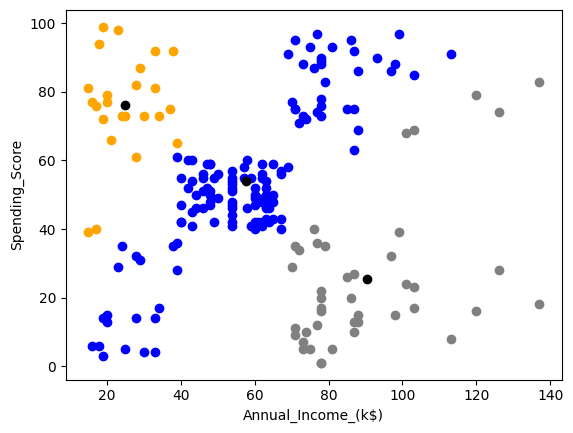

In [10]:
color=['grey','blue','orange']
for k in range(K):
   data=X[X["Cluster"]==k+1]
   plt.scatter(data["Annual_Income_(k$)"],data["Spending_Score"],c=color[k])
plt.scatter(centroids["Annual_Income_(k$)"],centroids["Spending_Score"],c='black')
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending_Score')
plt.show()

In [11]:
from sklearn.cluster import KMeans
km_sample = KMeans(n_clusters= 3 ) 
km_sample.fit(customer_data[["Annual_Income_(k$)" , "Spending_Score" ]])

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",3
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",None
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


<Axes: xlabel='Annual_Income_(k$)', ylabel='Spending_Score'>

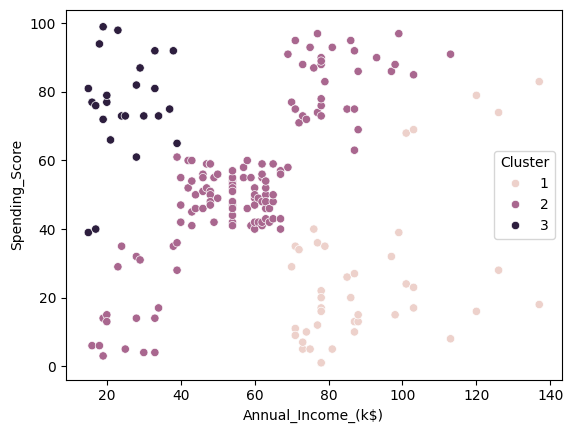

In [12]:
import seaborn as sns 
labels_sample = km_sample.labels_ 
customer_data['label'] = labels_sample
sns.scatterplot(x='Annual_Income_(k$)', y='Spending_Score', hue='Cluster', data=X)


In [13]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

#creating sample data
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])
#Here, two arrays x1 and x2 are defined, representing two features of the data points. 
# These arrays are then combined into a 2D array X using the zip function and reshaped 
# to the appropriate dimensions.
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)


In [14]:
# k means determine k
distortions = [] #it's the cost function value that we need to calculate
K = range(1,10) #test it on 10 iterations
for k in K:
   kmeanModel = KMeans(n_clusters=k) #calculate kmeans 
   kmeanModel.fit(X)
   #The cdist function computes the Euclidean distance between each data point and the cluster centers.
   # The np.min function finds the minimum distance for each point, and the sum of these minimum distances is computed.
   distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

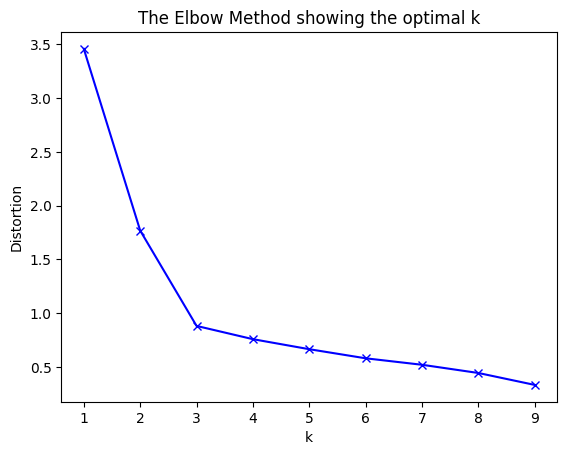

In [15]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [16]:
from sklearn.metrics import silhouette_score

sil_avg = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for k in range_n_clusters:
 kmeans = KMeans(n_clusters = k).fit(X)
 labels = kmeans.labels_
 sil_avg.append(silhouette_score(X, labels, metric = 'euclidean')) 

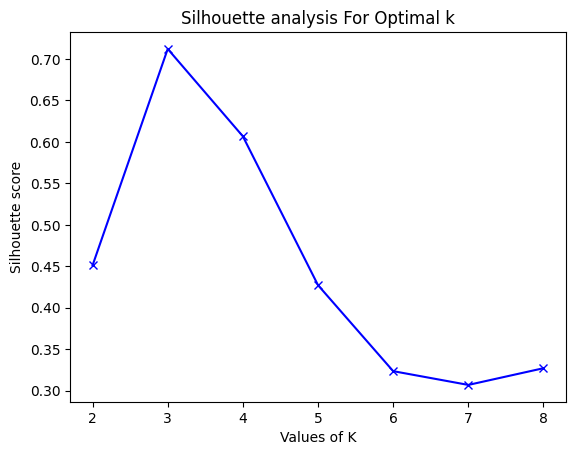

In [17]:
plt.plot(range_n_clusters,sil_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [18]:
kmeans = KMeans(n_clusters = 3).fit(X)
labels = kmeans.labels_
sil_avg.append(silhouette_score(X, labels, metric = 'euclidean')) 

In [19]:
import numpy as np

# Define the new data point
new_data_point = np.array([[12,3]])  

# Predict the cluster for the new data point
new_data_cluster = kmeans.predict(new_data_point)
print(f'New data point belongs to cluster: {new_data_cluster[0]}')

New data point belongs to cluster: 1
